<a href="https://colab.research.google.com/github/dhrumil1128/ResNet_Model_Testing/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input,Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os


In [15]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Crack.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/Positive/15001_1.jpg  
  inflating: /content/Positive/15002_1.jpg  
  inflating: /content/Positive/15003_1.jpg  
  inflating: /content/Positive/15004_1.jpg  
  inflating: /content/Positive/15005_1.jpg  
  inflating: /content/Positive/15006_1.jpg  
  inflating: /content/Positive/15007_1.jpg  
  inflating: /content/Positive/15008_1.jpg  
  inflating: /content/Positive/15009_1.jpg  
  inflating: /content/Positive/15010_1.jpg  
  inflating: /content/Positive/15011_1.jpg  
  inflating: /content/Positive/15012_1.jpg  
  inflating: /content/Positive/15013_1.jpg  
  inflating: /content/Positive/15014_1.jpg  
  inflating: /content/Positive/15015_1.jpg  
  inflating: /content/Positive/15016_1.jpg  
  inflating: /content/Positive/15017_1.jpg  
  inflating: /content/Positive/15018_1.jpg  
  inflating: /content/Positive/15019_1.jpg  
  inflating: /content/Positive/15020_1.jpg  
  inflating: /content/Positive/15021_1.jpg  
  in

In [16]:
import os

root_dir = '/content/'

# List all items in the root directory
items_in_root = os.listdir(root_dir)

# Filter for directories (folders)
subdirectories = [item for item in items_in_root if os.path.isdir(os.path.join(root_dir, item))]

# Print the number of directories and their names
print(f"Number of subdirectories found: {len(subdirectories)}")
print("Subdirectories:", subdirectories)

Number of subdirectories found: 6
Subdirectories: ['.config', 'Positive', 'Negative', 'drive', '.ipynb_checkpoints', 'sample_data']


In [17]:
!mkdir /content/dataset_clean

In [18]:
!mv /content/Negative /content/dataset_clean/
!mv /content/Positive /content/dataset_clean/

In [19]:
# Load the dataset :
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)
train_genrator = train_datagen.flow_from_directory(
     '/content/dataset_clean/',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training'

)

val_genrator = train_datagen.flow_from_directory(
    '/content/dataset_clean/',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation'
)



Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [20]:
# import the resnet model :
from tensorflow.keras.applications import ResNet50


In [21]:
# Buid and Compile the Model
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
predictions = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [29]:
# Train the model
history = model.fit(
    train_genrator,
    validation_data=val_genrator,
    epochs=10 # Start with 5 epochs
)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 105s 105ms/step - accuracy: 0.9744 - loss: 0.0927 - val_accuracy: 0.9839 - val_loss: 0.0513
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 105s 105ms/step - accuracy: 0.9834 - loss: 0.0586 - val_accuracy: 0.9921 - val_loss: 0.0243
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 106s 106ms/step - accuracy: 0.9820 - loss: 0.0663 - val_accuracy: 0.9909 - val_loss: 0.0263
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 105s 105ms/step - accuracy: 0.9853 - loss: 0.0510 - val_accuracy: 0.9847 - val_loss: 0.0484
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 105s 105ms/step - accuracy: 0.9822 - loss: 0.0619 - val_accuracy: 0.9926 - val_loss: 0.0246
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 105s 105ms/step - accuracy: 0.9823 - loss: 0.0674 - val_accuracy: 0.9320 - val_loss: 0.3266
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 105s 105ms/step - accuracy: 0.9800 - loss: 0.0735 - val_accuracy: 0.9901 - val_loss: 0.0383
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 105s 105ms/step - ac

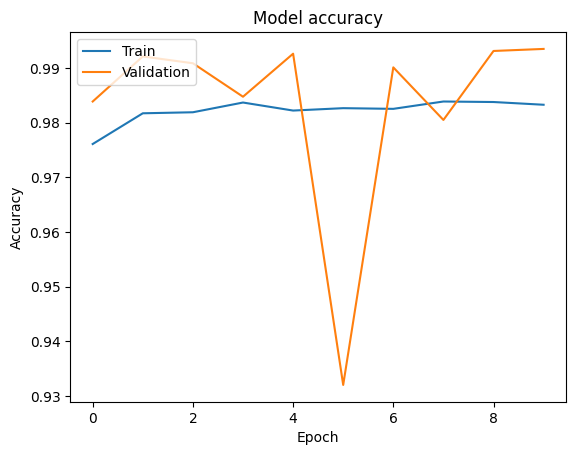

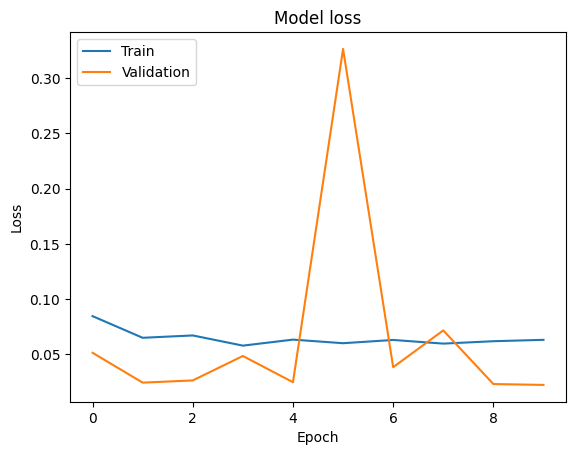

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
# Assuming you have the 'history' object from your model.fit() call

# Get the final training accuracy and loss
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]

# Get the final validation accuracy and loss
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.9833
Final Training Loss: 0.0630
Final Validation Accuracy: 0.9935
Final Validation Loss: 0.0222


In [33]:
# Save the model to a file
model.save('ResNet_Model_Testing.keras')

250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.51      0.51      4000
    Positive       0.50      0.50      0.50      4000

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.50      0.50      0.50      8000



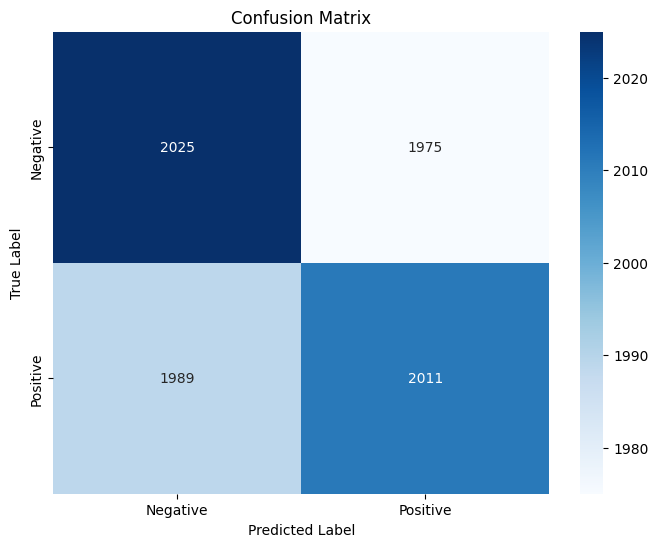

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the true labels of the validation set
# The 'classes' attribute of the generator provides the true labels
true_labels = val_genrator.classes

# 2. Get the file paths in the same order as the labels
file_paths = val_genrator.filepaths

# 3. Use the trained model to predict the probabilities for the validation data
# Reset the generator to get a predictable order
val_genrator.reset()
predictions_prob = model.predict(val_genrator)

# 4. Convert probabilities to class labels (0 or 1)
# Threshold is 0.5 for a binary classification problem
predicted_labels = (predictions_prob > 0.5).astype(int).flatten()

# 5. Get the class labels from the generator
class_labels = list(val_genrator.class_indices.keys())

# 6. Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# 7. Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print("Classification Report:\n", report)

# 8. Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [45]:
import os

# The correct path based on your image
bad_samples_path = '/content/drive/MyDrive/ColabNotebooks/GOOD SAMPLE/'

# List the files in the directory to confirm it's working
print(os.listdir(bad_samples_path))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ColabNotebooks/GOOD SAMPLE/'

In [35]:
# Testing the Model on Sample Images :

import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the saved model (replace with your saved model name)
model_path = 'final_crack_detector.h5'
# Load the trained model
loaded_model = load_model(model_path)

# Function to preprocess and predict an image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make a prediction
    prediction = loaded_model.predict(img_array)[0][0]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Prediction: {prediction:.4f}")
    plt.axis('off')
    plt.show()

    # Interpret the result
    if prediction > 0.5:
        print(f"Prediction: {prediction:.4f} -> The model predicts a crack is present.")
    else:
        print(f"Prediction: {prediction:.4f} -> The model predicts no crack.")

# Predict on the good sample
print("--- Predicting on Good Sample ---")
predict_image('WIN_20250917_12_25_29_Pro.jpg')

# Predict on the cracked sample
print("\n--- Predicting on Cracked Sample ---")
predict_image('WIN_20250917_12_25_38_Pro.jpg')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'final_crack_detector.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Requierments :


Minimum System Requirements
Your ResNet model, once trained and saved, can be used on a machine with relatively modest specifications. You will need:

Operating System: Windows 10/11, macOS, or a Linux distribution (Ubuntu is common).

RAM: 8 GB is the absolute minimum, but 16 GB is recommended for smooth operation, especially if you want to use the model within other applications or process a large number of images at once.

CPU: An Intel Core i5 or equivalent processor is sufficient. The model will run, but processing speed will be slower than with a GPU.

Hard Drive: A standard HDD or SSD is fine. Your 1TB HDD and 256GB SSD are more than enough. An SSD is highly recommended for faster loading times of the model file and the images.

GPU (Optional but Highly Recommended): A dedicated GPU is not strictly required to use the trained model for inference, but it will dramatically speed up the prediction process. For a smooth experience, a GPU with 4 GB of VRAM is a good starting point (e.g., an NVIDIA GeForce GTX 1650 or equivalent).

